Temperature Prediction

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

A. Data processing

a. Reading the data 

In [33]:
dataset=pd.read_csv("/content/sample_data/Weather.csv")
for i in dataset.columns:
  if i not in ['MinTemp','MaxTemp']:
    dataset=dataset.drop([i], axis=1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


b. To take a look at the dataset using head function of pandas

In [34]:
dataset.head()

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667


c. Have a descriptive exploration on data using describe function from
pandas

In [28]:
dataset.describe()

,WindGustSpd,MaxTemp,MinTemp,MeanTemp
count,119040.000000,119040.000000,119040.000000,119040.000000
mean,0.168818,27.045111,17.789511,22.411631
std,2.611819,8.717817,8.334572,8.297982
min,0.000000,-33.333333,-38.333333,-35.555556
25%,0.000000,25.555556,15.000000,20.555556
50%,0.000000,29.444444,21.111111,25.555556
75%,0.000000,31.666667,23.333333,27.222222
max,75.932000,50.000000,34.444444,40.000000


B. Data visualization

a. Make the histogram plot for maximum and minimum temperature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd36572750>,
      dtype=object)

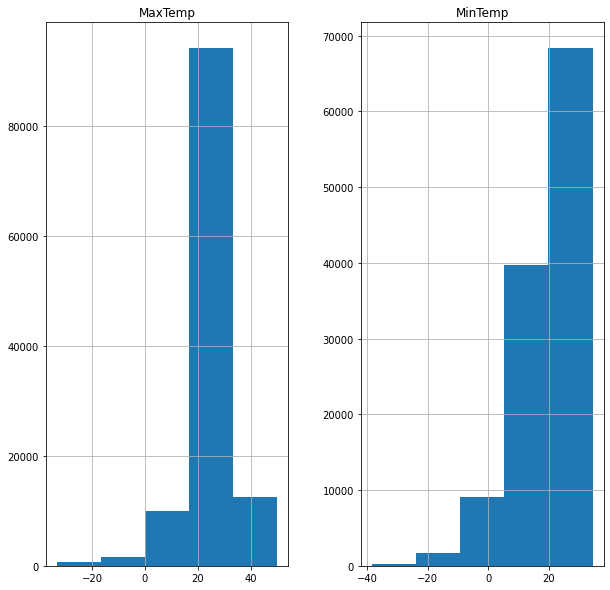

In [29]:
dataset.hist(['MaxTemp','MinTemp'],bins=5,figsize = (10,10))

C. Creating train and test dataset

a. split 80% of the data to the training set while 20% of the data to test set
using below code. The test_size variable is where we actually specify the
proportion of the test set.

In [42]:
attribute = np.array(dataset['MinTemp']).reshape(-1, 1)
label = np.array(dataset['MaxTemp']).reshape(-1, 1)
attribute_train, attribute_test, label_train, label_test = train_test_split(attribute,label, test_size=0.20,
                                                    random_state=7)

D. Modelling using sklearn package to model data

a. Find coefficient and Intercept in the simple linear regression, these are the
parameters of the fit line

In [43]:
model = LinearRegression()
model.fit(attribute_train, label_train)

0.7628929430105108


b. Plot the fit line over the data

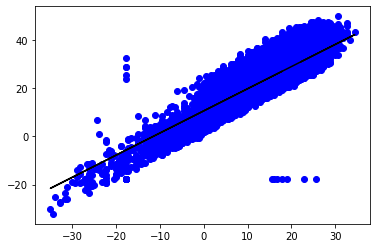

In [45]:
label_pred = model.predict(attribute_test)
plt.scatter(attribute_test, label_test, color ='b')
plt.plot(attribute_test, label_pred, color ='k')
plt.show()

c. Compare the actual output values for X_test with the predicted values

In [49]:
model.score(attribute_test, label_test)

0.7628929430105108

E. Evaluation

a. Mean absolute error

In [50]:
np.mean(np.abs(label_test - label_pred))

3.185367413125479

b. Residual sum of squares (MSE)

In [51]:
np.mean(np.square(label_test - label_pred))

17.533880981030382

c. R2-score

In [58]:
r2_score(label_test ,label_pred)

0.7628929430105108